<a href="https://colab.research.google.com/github/Hich11/ML-Prjects/blob/master/Quick_Linear_Models_for_Insurance_charges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('/content/insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [17]:
num_feat=df.select_dtypes(include=np.number).columns
cat_feat=df.select_dtypes(include='object').columns

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


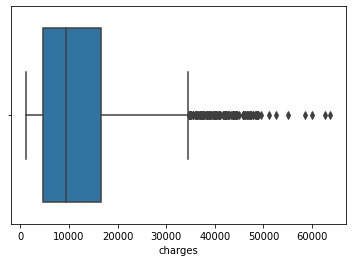

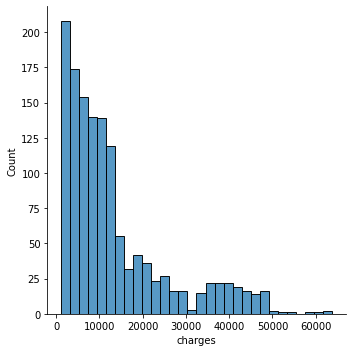

In [24]:
sns.boxplot(x='charges',data=df,orient='v')
sns.displot(df['charges'])

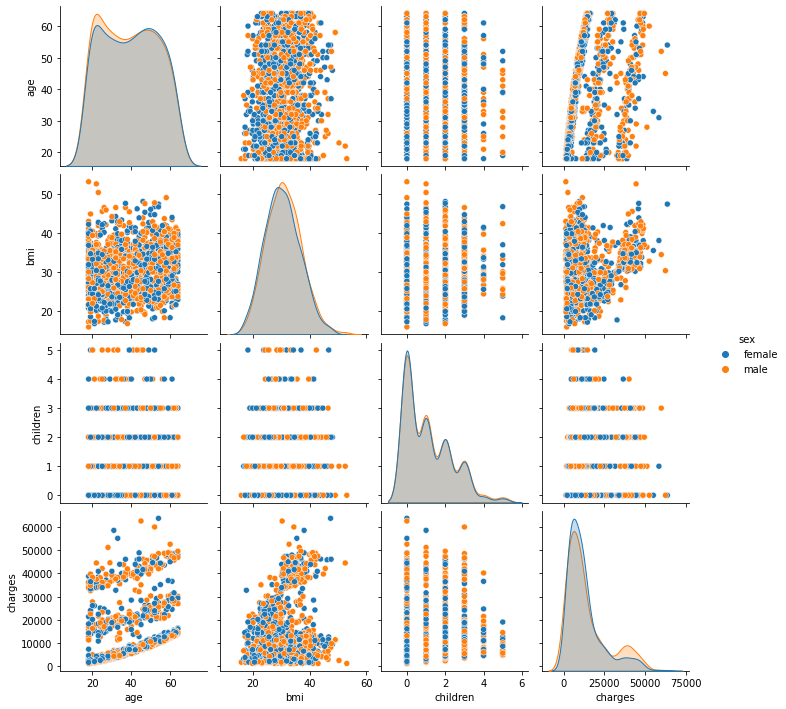

In [27]:
sns.pairplot(df,hue='sex')

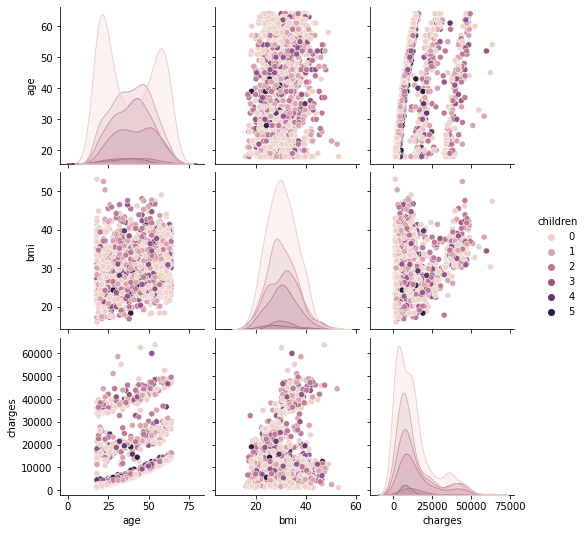

In [28]:
sns.pairplot(df,hue='children')

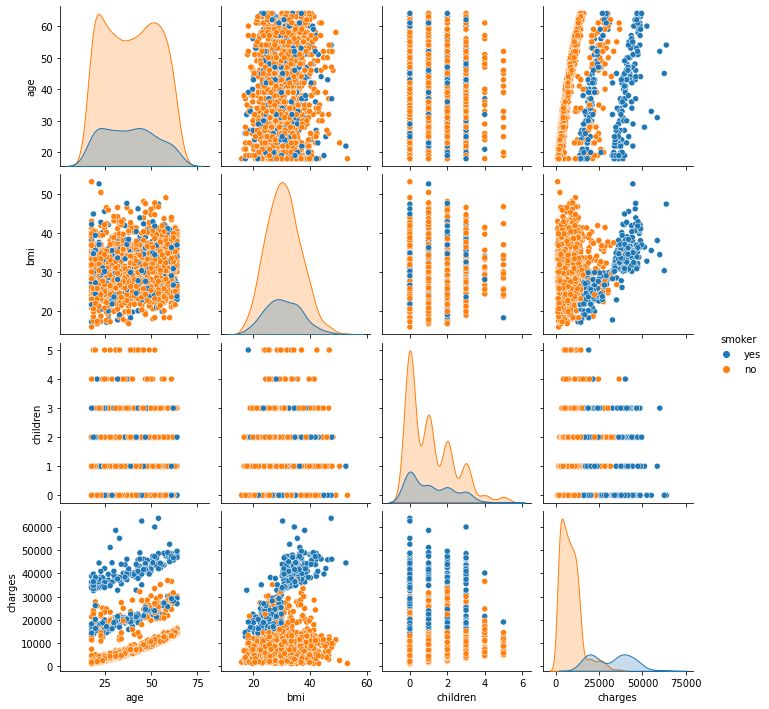

In [29]:
sns.pairplot(df,hue='smoker')

In [33]:
df_encoded=pd.get_dummies(df,drop_first=True)

In [34]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [35]:
df_encoded['target_charges']=df_encoded['charges']

In [39]:
df_encoded.drop('charges',axis=1,inplace=True)

In [40]:
df_encoded

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,target_charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0,10600.54830
1334,18,31.920,0,0,0,0,0,0,2205.98080
1335,18,36.850,0,0,0,0,1,0,1629.83350
1336,21,25.800,0,0,0,0,0,1,2007.94500


In [41]:
X=df_encoded.iloc[:,:-1].values
y=df_encoded.iloc[:,-1].values

In [48]:
#tarin test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=777)

In [44]:
#import models
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [45]:
models=[
        ('LR',LinearRegression()),
        ('Lasso',Lasso()),
        ('Ridge',Ridge()),
        ('ElasticNet',ElasticNet()),
        ('DT',DecisionTreeRegressor()),
        ('SVR',SVR()),

]

In [54]:
results=[]
names=[]
for name, model in models:
  kfold=KFold(n_splits=5,random_state=777)
  cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='r2')
  results.append(cv_results)
  names.append(name)
  print('{:10}: Mean Score:{:2f}====> std:({:3f})'.format(name,cv_results.mean(),cv_results.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR        : Mean Score:0.736237====> std:(0.034268)
Lasso     : Mean Score:0.736246====> std:(0.034268)
Ridge     : Mean Score:0.736271====> std:(0.033835)
ElasticNet: Mean Score:0.372088====> std:(0.031158)
DT        : Mean Score:0.698327====> std:(0.045931)
SVR       : Mean Score:-0.100434====> std:(0.027856)
